# 1. Exploratory Data Analysis

## 1.2. Air Carrier Financial Reports (Form 41 Financial Data)

### 1.2.2. Schedule P-12(a) Fuel

Source: https://www.transtats.bts.gov/Tables.asp?DB_ID=135&DB_Name=Air%20Carrier%20Financial%20Reports%20%28Form%2041%20Financial%20Data%29

<em>Note</em>: Over time both the code and the name of a carrier may change and the same code or name may be assumed by a different airline. To ensure that you are analyzing data from the same airline, TranStats provides four airline-specific variables that identify one and only one carrier or its entity: Airline ID (AirlineID), Unique Carrier Code (UniqueCarrier), Unique Carrier Name (UniqueCarrierName), and Unique Entity (UniqCarrierEntity). A unique airline (carrier) is defined as one holding and reporting under the same DOT certificate regardless of its Code, Name, or holding company/corporation. US Airways and America West started to report combined on-time data in January 2006 and combined traffic and financial data in October 2007 following their 2005 merger announcement. Delta and Northwest began reporting jointly in January 2010 following their 2008 merger announcement. Continental Micronesia was combined into Continental Airlines in December 2010 and joint reporting began in January 2011. Atlantic Southeast and ExpressJet began reporting jointly in January 2012. United and Continental began reporting jointly in January 2012 following their 2010 merger announcement. Endeavor (9E) operated as Pinnacle prior to August 2013. Envoy (MQ) operated as American Eagle prior to April 2014. Southwest (WN) and AirTran (FL) began reporting jointly in January 2015 following their 2011 merger announcement. American (AA) and US Airways (US) began reporting jointly as AA in July 2015 following their 2013 merger announcement. Alaska (AS) and Virgin America (VX) began reporting jointly as AS in April 2018 following their 2016 merger announcement.
        
- **P12A_fuel**:
    - **Summary**:
        - Air Carrier Financial : Schedule P-12(a)
    - **Description**:
        - This table contains monthly reported fuel costs, and gallons of fuel consumed, by air carrier and category of fuel use, including scheduled and non-scheduled service for domestic and international traffic regions. Data since 2000 are available for major, national, and regional air carriers subject to reporting requirements. For earlier data, go to [Fuel Cost and Consumption 1977-1999](http://www.bts.gov/xml/fuel/report/src/index.xml).
    - **File**:
        - 494124489_T_F41SCHEDULE_P12A.zip

___

In [29]:
# Import libraries to be used:

import pandas as pd
import numpy as np
import os.path
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import warnings # warnings.filterwarnings(action='ignore') # https://docs.python.org/3/library/warnings.html#the-warnings-filter
# from zipfile import ZipFile # De momento no ha hecho falta 

In [30]:
# Show all columns and rows in DataFrames
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None) # It greatly slows down the output display and freezes the kernel

# Show in notebook
%matplotlib inline

# style -> plt.style.available
# plt.style.use('seaborn')
plt.style.use('ggplot')

# theme
sns.set_theme(context='notebook',
              style="darkgrid") # {darkgrid, whitegrid, dark, white, ticks}

# color_palette -> https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
palette = sns.color_palette("flare", as_cmap=True);

In [31]:
if os.name == 'nt': # Windows
    root = r"C:\Users\turge\CompartidoVM\0.TFM"
    print("Running on Windows.")
elif os.name == 'posix': # Ubuntu
    root = "/home/dsc/shared/0.TFM"
    print("Running on Ubuntu.")
print("root path\t", root)

Running on Windows.
root path	 C:\Users\turge\CompartidoVM\0.TFM


___

In [32]:
csv_path = os.path.join(root,
                        "Raw_Data",
                        "US_DoT",
                        "494124489_T_F41SCHEDULE_P12A.zip")
csv_path

'C:\\Users\\turge\\CompartidoVM\\0.TFM\\Raw_Data\\US_DoT\\494124489_T_F41SCHEDULE_P12A.zip'

In [33]:
# Since 'pd.read_csv' works fine with zipped csv files, we can proceed directly:
cols = pd.read_csv(csv_path, nrows=1).columns # After normally importing it, an undesired extra blank column is loaded
df4 = pd.read_csv(csv_path,
                  encoding='latin1',
                  usecols=cols[:-1]) # This way, the extra column is disregarded for the loading process
df4

,YEAR,QUARTER,MONTH,AIRLINE_ID,UNIQUE_CARRIER,CARRIER,CARRIER_NAME,CARRIER_GROUP_NEW,SALA_GALLONS,SDOM_GALLONS,SDOMT_GALLONS,SATL_GALLONS,SPAC_GALLONS,SLAT_GALLONS,SINT_GALLONS,TS_GALLONS,NALA_GALLONS,NDOM_GALLONS,NDOMT_GALLONS,NATL_GALLONS,NPAC_GALLONS,NLAT_GALLONS,MAC_GALLONS,NINT_GALLONS,TN_GALLONS,TDOMT_GALLONS,TINT_GALLONS,TOTAL_GALLONS,SALA_COST,SDOM_COST,SDOMT_COST,SATL_COST,SPAC_COST,SLAT_COST,SINT_COST,TS_COST,NALA_COST,NDOM_COST,NDOMT_COST,NATL_COST,NPAC_COST,NLAT_COST,MAC_COST,NINT_COST,TN_COST,TDOMT_COST,TINT_COST,TOTAL_COST
0,1990,1,1,19065.0,AJ,AJ,Air Micronesia Inc.,1,0.0,224686.0,224686.0,0.0,0.0,253413.0,253413.0,478099.0,0.0,345237.0,345237.0,0.0,0.0,0.0,274148.0,274148.0,NaN,569923.0,NaN,1097484.0,0.0,191709.0,191709.0,0.0,0.0,216219.0,216219.0,407928.0,0.0,294567.0,294567.0,NaN,NaN,NaN,233916.0,233916.0,528483.0,486276.0,450135.0,936411.0
1,1990,1,1,20046.0,ZW,ZW,Air Wisconsin Inc.,2,0.0,2335690.0,2335690.0,0.0,0.0,0.0,0.0,2335690.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2335690.0,NaN,2335690.0,0.0,2338029.0,2338029.0,0.0,0.0,0.0,0.0,2338029.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,2338029.0,0.0,2338029.0
2,1990,1,1,19930.0,AS,AS,Alaska Airlines Inc.,3,0.0,16232053.0,16232053.0,0.0,0.0,0.0,0.0,16232053.0,0.0,69767.0,69767.0,0.0,0.0,0.0,0.0,0.0,NaN,16301820.0,NaN,16301820.0,0.0,11575602.0,11575602.0,0.0,0.0,0.0,0.0,11575602.0,0.0,48436.0,48436.0,NaN,NaN,NaN,NaN,0.0,48436.0,11624038.0,0.0,11624038.0
3,1990,1,1,19678.0,AQ,AQ,Aloha Airlines Inc.,2,0.0,2923629.0,2923629.0,0.0,0.0,0.0,0.0,2923629.0,0.0,7356.0,7356.0,0.0,33281.0,0.0,0.0,33281.0,NaN,2930985.0,NaN,2964266.0,0.0,2168427.0,2168427.0,0.0,0.0,0.0,0.0,2168427.0,0.0,5425.0,5425.0,NaN,24541.0,NaN,NaN,24541.0,29966.0,2173852.0,24541.0,2198393.0
4,1990,1,1,19991.0,HP,HP,America West Airlines Inc.,3,0.0,23501084.0,23501084.0,0.0,0.0,0.0,0.0,23501084.0,0.0,35838.0,35838.0,0.0,0.0,0.0,0.0,0.0,NaN,23536922.0,NaN,23536922.0,0.0,17884951.0,17884951.0,0.0,0.0,0.0,0.0,17884951.0,0.0,26059.0,26059.0,NaN,NaN,NaN,NaN,0.0,26059.0,17911010.0,0.0,17911010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21207,2020,2,5,19393.0,WN,WN,Southwest Airlines Co.,3,0.0,56436273.0,56436273.0,0.0,0.0,0.0,0.0,56436273.0,0.0,178833.0,178833.0,0.0,0.0,0.0,0.0,0.0,178833.0,56615106.0,0.0,56615106.0,0.0,69746812.0,69746812.0,0.0,0.0,0.0,0.0,69746812.0,0.0,186869.0,186869.0,0.0,0.0,0.0,0.0,0.0,186869.0,69933681.0,0.0,69933681.0
21208,2020,2,6,19393.0,WN,WN,Southwest Airlines Co.,3,0.0,90878694.0,90878694.0,0.0,0.0,0.0,0.0,90878694.0,0.0,245868.0,245868.0,0.0,0.0,0.0,0.0,0.0,245868.0,91124562.0,0.0,91124562.0,0.0,106274476.0,106274476.0,0.0,0.0,0.0,0.0,106274476.0,0.0,310138.0,310138.0,0.0,0.0,0.0,0.0,0.0,310138.0,106584614.0,0.0,106584614.0
21209,2020,3,7,19393.0,WN,WN,Southwest Airlines Co.,3,0.0,115244413.0,115244413.0,0.0,0.0,111944.0,111944.0,115356357.0,0.0,157320.0,157320.0,0.0,0.0,0.0,0.0,0.0,157320.0,115401733.0,111944.0,115513677.0,0.0,130238823.0,130238823.0,0.0,0.0,158239.0,158239.0,130397062.0,0.0,190899.0,190899.0,0.0,0.0,0.0,0.0,0.0,190899.0,130429722.0,158239.0,130587961.0
21210,2020,3,8,19393.0,WN,WN,Southwest Airlines Co.,3,0.0,116189469.0,116189469.0,0.0,0.0,179465.0,179465.0,116368934.0,0.0,239003.0,239003.0,0.0,0.0,0.0,0.0,0.0,239003.0,116428472.0,179465.0,116607937.0,0.0,131711178.0,131711178.0,0.0,0.0,257711.0,257711.0,131968889.0,0.0,286634.0,286634.0,0.0,0.0,0.0,0.0,0.0,286634.0,131997812.0,257711.0,132255523.0


In [34]:
df4.describe()

,YEAR,QUARTER,MONTH,AIRLINE_ID,CARRIER_GROUP_NEW,SALA_GALLONS,SDOM_GALLONS,SDOMT_GALLONS,SATL_GALLONS,SPAC_GALLONS,SLAT_GALLONS,SINT_GALLONS,TS_GALLONS,NALA_GALLONS,NDOM_GALLONS,NDOMT_GALLONS,NATL_GALLONS,NPAC_GALLONS,NLAT_GALLONS,MAC_GALLONS,NINT_GALLONS,TN_GALLONS,TDOMT_GALLONS,TINT_GALLONS,TOTAL_GALLONS,SALA_COST,SDOM_COST,SDOMT_COST,SATL_COST,SPAC_COST,SLAT_COST,SINT_COST,TS_COST,NALA_COST,NDOM_COST,NDOMT_COST,NATL_COST,NPAC_COST,NLAT_COST,MAC_COST,NINT_COST,TN_COST,TDOMT_COST,TINT_COST,TOTAL_COST
count,21212.000000,21212.000000,21212.000000,21211.000000,21212.000000,2.120900e+04,2.121000e+04,2.121100e+04,2.121000e+04,2.121000e+04,2.120900e+04,2.121000e+04,2.121100e+04,2.120800e+04,2.121100e+04,2.121000e+04,2.120900e+04,2.120700e+04,2.121000e+04,2.119200e+04,2.121200e+04,1.479300e+04,2.120900e+04,1.479600e+04,2.120600e+04,2.121000e+04,2.078200e+04,2.121200e+04,2.121000e+04,2.120900e+04,2.121000e+04,2.121100e+04,2.121200e+04,2.121200e+04,2.095100e+04,2.121200e+04,2.015600e+04,1.996000e+04,2.005100e+04,2.017100e+04,2.121200e+04,2.121200e+04,2.121200e+04,2.121100e+04,2.121200e+04
mean,2005.104799,2.482604,6.445550,20210.031635,2.013153,4.720369e+04,1.710970e+07,1.715610e+07,2.954238e+06,2.590213e+06,1.571749e+06,7.116126e+06,2.427189e+07,5.671584e+03,7.106111e+05,7.162850e+05,2.279102e+05,1.919392e+05,1.381894e+05,2.770664e+05,8.347535e+05,1.507356e+06,1.787402e+07,8.379038e+06,2.582797e+07,7.310573e+04,2.509929e+07,2.466359e+07,4.722423e+06,4.023312e+06,2.746041e+06,1.149104e+07,3.615409e+07,1.088945e+04,8.920927e+05,8.918393e+05,4.240376e+05,3.863875e+05,2.190819e+05,5.484942e+05,1.495177e+06,2.387337e+06,2.555560e+07,1.298644e+07,3.854143e+07
std,8.410320,1.114800,3.443162,382.275830,0.776321,2.511252e+05,3.790329e+07,3.790612e+07,9.817790e+06,8.990456e+06,5.796514e+06,2.150829e+07,5.657877e+07,5.174253e+04,3.035314e+06,3.037515e+06,1.041252e+06,1.226081e+06,5.121675e+05,1.008291e+06,3.039487e+06,5.037892e+06,3.789209e+07,2.324627e+07,5.649180e+07,4.131225e+05,6.343710e+07,6.290959e+07,2.027512e+07,1.596575e+07,1.200732e+07,4.380308e+07,1.015148e+08,1.014572e+05,3.873233e+06,3.856745e+06,2.303868e+06,2.820016e+06,9.390189e+05,2.244237e+06,6.843343e+06,8.956023e+06,6.304800e+07,4.415476e+07,1.017138e+08
min,1990.000000,1.000000,1.000000,19065.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-5.933000e+03,-5.933000e+03,-5.148400e+04,-4.799300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.939000e+03,-3.998000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-2.045399e+06,-2.045399e+06,-1.948234e+06,-4.746240e+05,0.000000e+00,-2.422858e+06,-4.468257e+06,0.000000e+00,-5.362970e+05,-5.362970e+05,-8.236820e+05,-1.080340e+05,-1.791000e+04,-2.949686e+06,-2.949686e+06,-2.933812e+06,-5.362970e+05,0.000000e+00,0.000000e+00
25%,1998.000000,1.000000,3.000000,20007.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.746940e+05,0.000000e+00,6.547705e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.872665e+05,0.000000e+00,1.008147e+06
50%,2005.000000,2.000000,6.000000,20207.000000,2.000000,0.000000e+00,6.138405e+05,6.440420e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.880537e+06,0.000000e+00,3.600000e+04,4.469900e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.100000e+04,2.003245e+06,2.512295e+05,3.588528e+06,0.000000e+00,8.807710e+05,8.808605e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.711964e+06,0.000000e+00,4.992000e+04,5.998450e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.806740e+05,1.877994e+06,4.256850e+05,4.026764e+06
75%,2

In [35]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21212 entries, 0 to 21211
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YEAR               21212 non-null  int64  
 1   QUARTER            21212 non-null  int64  
 2   MONTH              21212 non-null  int64  
 3   AIRLINE_ID         21211 non-null  float64
 4   UNIQUE_CARRIER     20970 non-null  object 
 5   CARRIER            21003 non-null  object 
 6   CARRIER_NAME       21211 non-null  object 
 7   CARRIER_GROUP_NEW  21212 non-null  int64  
 8   SALA_GALLONS       21209 non-null  float64
 9   SDOM_GALLONS       21210 non-null  float64
 10  SDOMT_GALLONS      21211 non-null  float64
 11  SATL_GALLONS       21210 non-null  float64
 12  SPAC_GALLONS       21210 non-null  float64
 13  SLAT_GALLONS       21209 non-null  float64
 14  SINT_GALLONS       21210 non-null  float64
 15  TS_GALLONS         21211 non-null  float64
 16  NALA_GALLONS       212

Additional information on each column meaning can be found [here](https://www.transtats.bts.gov/Fields.asp?Table_ID=294&SYS_Table_Name=T_F41SCHEDULE_P12A&User_Table_Name=Schedule%20P-12(a)&Year_Info=1&First_Year=1990&Last_Year=2020&Rate_Info=0&Frequency=Monthly&Data_Frequency=Annual,Quarterly,Monthly).

There are some missing values. Let's further delve into it:

In [36]:
# Absolute number of missing values by column:
df4.isna().sum()

YEAR                    0
QUARTER                 0
MONTH                   0
AIRLINE_ID              1
UNIQUE_CARRIER        242
CARRIER               209
CARRIER_NAME            1
CARRIER_GROUP_NEW       0
SALA_GALLONS            3
SDOM_GALLONS            2
SDOMT_GALLONS           1
SATL_GALLONS            2
SPAC_GALLONS            2
SLAT_GALLONS            3
SINT_GALLONS            2
TS_GALLONS              1
NALA_GALLONS            4
NDOM_GALLONS            1
NDOMT_GALLONS           2
NATL_GALLONS            3
NPAC_GALLONS            5
NLAT_GALLONS            2
MAC_GALLONS            20
NINT_GALLONS            0
TN_GALLONS           6419
TDOMT_GALLONS           3
TINT_GALLONS         6416
TOTAL_GALLONS           6
SALA_COST               2
SDOM_COST             430
SDOMT_COST              0
SATL_COST               2
SPAC_COST               3
SLAT_COST               2
SINT_COST               1
TS_COST                 0
NALA_COST               0
NDOM_COST             261
NDOMT_COST  

In [37]:
# Relative frequency of missing values by column:
df4.isna().sum() / len(df4) * 100

YEAR                  0.000000
QUARTER               0.000000
MONTH                 0.000000
AIRLINE_ID            0.004714
UNIQUE_CARRIER        1.140864
CARRIER               0.985291
CARRIER_NAME          0.004714
CARRIER_GROUP_NEW     0.000000
SALA_GALLONS          0.014143
SDOM_GALLONS          0.009429
SDOMT_GALLONS         0.004714
SATL_GALLONS          0.009429
SPAC_GALLONS          0.009429
SLAT_GALLONS          0.014143
SINT_GALLONS          0.009429
TS_GALLONS            0.004714
NALA_GALLONS          0.018857
NDOM_GALLONS          0.004714
NDOMT_GALLONS         0.009429
NATL_GALLONS          0.014143
NPAC_GALLONS          0.023572
NLAT_GALLONS          0.009429
MAC_GALLONS           0.094286
NINT_GALLONS          0.000000
TN_GALLONS           30.261173
TDOMT_GALLONS         0.014143
TINT_GALLONS         30.247030
TOTAL_GALLONS         0.028286
SALA_COST             0.009429
SDOM_COST             2.027154
SDOMT_COST            0.000000
SATL_COST             0.009429
SPAC_COS

'TN_GALLONS' and 'TINT_GALLONS' present around 30% of empty elements. As a reminder:
- TN_GALLONS = Total Non Scheduled Service - Fuel Consumption (Gallons)
    - However, this variable should be defined as the sum of:
        - NDOM_GALLONS = Total Non-Scheduled Domestic, Fuel Consumption (Gallons)
        - NINT_GALLONS = Non Scheduled Service International Subtotal - Fuel Consumption (Gallons)
- TINT_GALLONS = Total International - Fuel Consumption (Gallons)
    - However, this variable should be defined as the sum of:
        - SINT_GALLONS = Scheduled Service International Subtotal - Fuel Consumption (Gallons)
        - NINT_GALLONS = Non Scheduled Service International Subtotal - Fuel Consumption (Gallons)

Let's explore it:

In [38]:
cols = ['NDOM_GALLONS', 'NINT_GALLONS', 'TN_GALLONS', 'SINT_GALLONS', 'NINT_GALLONS', 'TINT_GALLONS']
df4[cols].sample(10)

,NDOM_GALLONS,NINT_GALLONS,TN_GALLONS,SINT_GALLONS,NINT_GALLONS,TINT_GALLONS
18636,864632.0,2765687.0,3630319.0,0.0,2765687.0,2765687.0
12554,0.0,1860280.0,1860280.0,0.0,1860280.0,1860280.0
3862,0.0,2448953.0,NaN,0.0,2448953.0,NaN
2777,58811.0,9326.0,NaN,39783085.0,9326.0,NaN
11271,0.0,0.0,0.0,0.0,0.0,0.0
750,114916.0,0.0,NaN,1735379.0,0.0,NaN
4792,823205.0,268678.0,NaN,0.0,268678.0,NaN
10657,0.0,0.0,0.0,0.0,0.0,0.0
2368,83679.0,842676.0,NaN,0.0,842676.0,NaN
9707,62083.0,1153640.0,1215723.0,974443.0,1153640.0,2128083.0


With this, it is now confirmed that:
1. The "total" columns are indeed the sum of each addend, as expected following common sense.
2. Many times where a *0.0* value is found in any addend of the "total" column, the latter shows *NaN*.

Therefore, these "total" columns values will be replaced by the sum of each addend in order to fill the empty elements.

In [39]:
df4['TN_GALLONS'] = df4['NDOM_GALLONS'] + df4['NINT_GALLONS']
df4['TINT_GALLONS'] = df4['SINT_GALLONS'] + df4['NINT_GALLONS']

Let's check again with these changes.

In [40]:
# Absolute number of missing values by column:
df4.isna().sum()

YEAR                    0
QUARTER                 0
MONTH                   0
AIRLINE_ID              1
UNIQUE_CARRIER        242
CARRIER               209
CARRIER_NAME            1
CARRIER_GROUP_NEW       0
SALA_GALLONS            3
SDOM_GALLONS            2
SDOMT_GALLONS           1
SATL_GALLONS            2
SPAC_GALLONS            2
SLAT_GALLONS            3
SINT_GALLONS            2
TS_GALLONS              1
NALA_GALLONS            4
NDOM_GALLONS            1
NDOMT_GALLONS           2
NATL_GALLONS            3
NPAC_GALLONS            5
NLAT_GALLONS            2
MAC_GALLONS            20
NINT_GALLONS            0
TN_GALLONS              1
TDOMT_GALLONS           3
TINT_GALLONS            2
TOTAL_GALLONS           6
SALA_COST               2
SDOM_COST             430
SDOMT_COST              0
SATL_COST               2
SPAC_COST               3
SLAT_COST               2
SINT_COST               1
TS_COST                 0
NALA_COST               0
NDOM_COST             261
NDOMT_COST  

In [41]:
# Relative frequency of missing values by column:
df4.isna().sum() / len(df4) * 100

YEAR                 0.000000
QUARTER              0.000000
MONTH                0.000000
AIRLINE_ID           0.004714
UNIQUE_CARRIER       1.140864
CARRIER              0.985291
CARRIER_NAME         0.004714
CARRIER_GROUP_NEW    0.000000
SALA_GALLONS         0.014143
SDOM_GALLONS         0.009429
SDOMT_GALLONS        0.004714
SATL_GALLONS         0.009429
SPAC_GALLONS         0.009429
SLAT_GALLONS         0.014143
SINT_GALLONS         0.009429
TS_GALLONS           0.004714
NALA_GALLONS         0.018857
NDOM_GALLONS         0.004714
NDOMT_GALLONS        0.009429
NATL_GALLONS         0.014143
NPAC_GALLONS         0.023572
NLAT_GALLONS         0.009429
MAC_GALLONS          0.094286
NINT_GALLONS         0.000000
TN_GALLONS           0.004714
TDOMT_GALLONS        0.014143
TINT_GALLONS         0.009429
TOTAL_GALLONS        0.028286
SALA_COST            0.009429
SDOM_COST            2.027154
SDOMT_COST           0.000000
SATL_COST            0.009429
SPAC_COST            0.014143
SLAT_COST 

As expected, the dataset is now more complete in a proper way.

Many variables are not too useful, only "totals" will remain for the analysis.

In [43]:
int_cols = ['YEAR', 'AIRLINE_ID', 'UNIQUE_CARRIER', 'CARRIER', 'CARRIER_NAME',
            'TS_GALLONS', 'TN_GALLONS', 'TDOMT_GALLONS', 'TINT_GALLONS', 'TOTAL_GALLONS',
            'TS_COST', 'TN_COST', 'TDOMT_COST', 'TINT_COST', 'TOTAL_COST']

In [44]:
df4 = df4[int_cols]
df4

,YEAR,AIRLINE_ID,UNIQUE_CARRIER,CARRIER,CARRIER_NAME,TS_GALLONS,TN_GALLONS,TDOMT_GALLONS,TINT_GALLONS,TOTAL_GALLONS,TS_COST,TN_COST,TDOMT_COST,TINT_COST,TOTAL_COST
0,1990,19065.0,AJ,AJ,Air Micronesia Inc.,478099.0,619385.0,569923.0,527561.0,1097484.0,407928.0,528483.0,486276.0,450135.0,936411.0
1,1990,20046.0,ZW,ZW,Air Wisconsin Inc.,2335690.0,0.0,2335690.0,0.0,2335690.0,2338029.0,0.0,2338029.0,0.0,2338029.0
2,1990,19930.0,AS,AS,Alaska Airlines Inc.,16232053.0,69767.0,16301820.0,0.0,16301820.0,11575602.0,48436.0,11624038.0,0.0,11624038.0
3,1990,19678.0,AQ,AQ,Aloha Airlines Inc.,2923629.0,40637.0,2930985.0,33281.0,2964266.0,2168427.0,29966.0,2173852.0,24541.0,2198393.0
4,1990,19991.0,HP,HP,America West Airlines Inc.,23501084.0,35838.0,23536922.0,0.0,23536922.0,17884951.0,26059.0,17911010.0,0.0,17911010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21207,2020,19393.0,WN,WN,Southwest Airlines Co.,56436273.0,178833.0,56615106.0,0.0,56615106.0,69746812.0,186869.0,69933681.0,0.0,69933681.0
21208,2020,19393.0,WN,WN,Southwest Airlines Co.,90878694.0,245868.0,91124562.0,0.0,91124562.0,106274476.0,310138.0,106584614.0,0.0,106584614.0
21209,2020,19393.0,WN,WN,Southwest Airlines Co.,115356357.0,157320.0,115401733.0,111944.0,115513677.0,130397062.0,190899.0,130429722.0,158239.0,130587961.0
21210,2020,19393.0,WN,WN,Southwest Airlines Co.,116368934.0,239003.0,116428472.0,179465.0,116607937.0,131968889.0,286634.0,131997812.0,257711.0,132255523.0


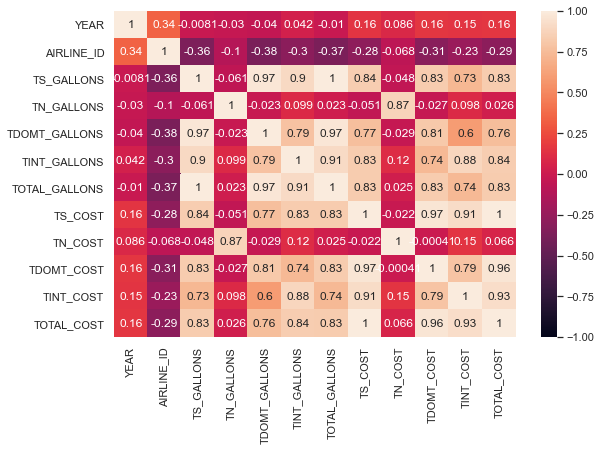

In [45]:
# Heatmap showing global correlations
fig, ax = plt.subplots(figsize=(9, 6))
ax = sns.heatmap(df4.corr(), vmin=-1, vmax=1, annot=True, cbar=True, cmap=sns.cm.rocket);

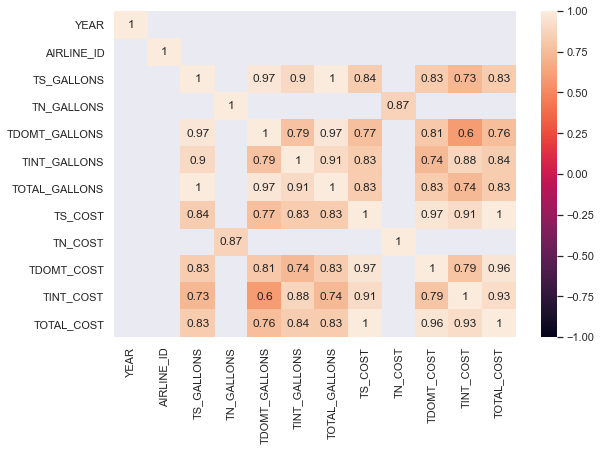

In [46]:
# Heatmap showing global correlations
fig, ax = plt.subplots(figsize=(9, 6))
ax = sns.heatmap(df4.corr(), vmin=-1, vmax=1, annot=True, cbar=True, cmap=sns.cm.rocket, mask=abs(df4.corr()) < 0.5);

### Annual analysis

In [18]:
group_year = df4.groupby('YEAR').sum()
group_year

,TS_GALLONS,TN_GALLONS,TDOMT_GALLONS,TINT_GALLONS,TOTAL_GALLONS,TS_COST,TN_COST,TDOMT_COST,TINT_COST,TOTAL_COST
YEAR,,,,,,,,,,
1990,1.542221e+10,7.246170e+08,1.221204e+10,3.937660e+09,1.614970e+10,1.198521e+10,6.303316e+08,9.331892e+09,3.283652e+09,1.261554e+10
1991,1.440973e+10,8.364063e+08,1.136001e+10,3.887859e+09,1.524787e+10,9.858833e+09,6.978391e+08,7.604275e+09,2.952396e+09,1.055667e+10
1992,1.509896e+10,5.755779e+08,1.159783e+10,4.079249e+09,1.567708e+10,9.556437e+09,4.163067e+08,7.168068e+09,2.804676e+09,9.972744e+09
1993,1.522824e+10,8.391263e+08,1.195998e+10,4.111795e+09,1.607178e+10,9.141563e+09,6.055392e+08,7.019800e+09,2.727303e+09,9.747102e+09
1994,1.564038e+10,1.181010e+09,1.250055e+10,4.325403e+09,1.682596e+10,8.632165e+09,7.707925e+08,6.777734e+09,2.625223e+09,9.402957e+09
1995,1.613041e+10,1.183046e+09,1.280795e+10,4.509924e+09,1.731787e+10,8.942374e+09,7.500664e+08,6.990698e+09,2.701742e+09,9.692440e+09
1996,1.660993e+10,1.231381e+09,1.318601e+10,4.658093e+09,1.784410e+10,1.095091e+10,9.242965e+08,8.540221e+09,3.334987e+09,1.187521e+10
1997,1.734889e+10,1.266399e+09,1.365763e+10,4.961600e+09,1.861923e+10,1.104552e+10,9.636474e+08,8.610523e+09,3.398645e+09,1.200917e+10
1998,1.686449e+10,1.353575e+09,1.330314e+10,4.915461e+09,1.821860e+10,8.519523e+09,7.916236e+08,6.680002e+09,2.631145e+09,9.311147e+09


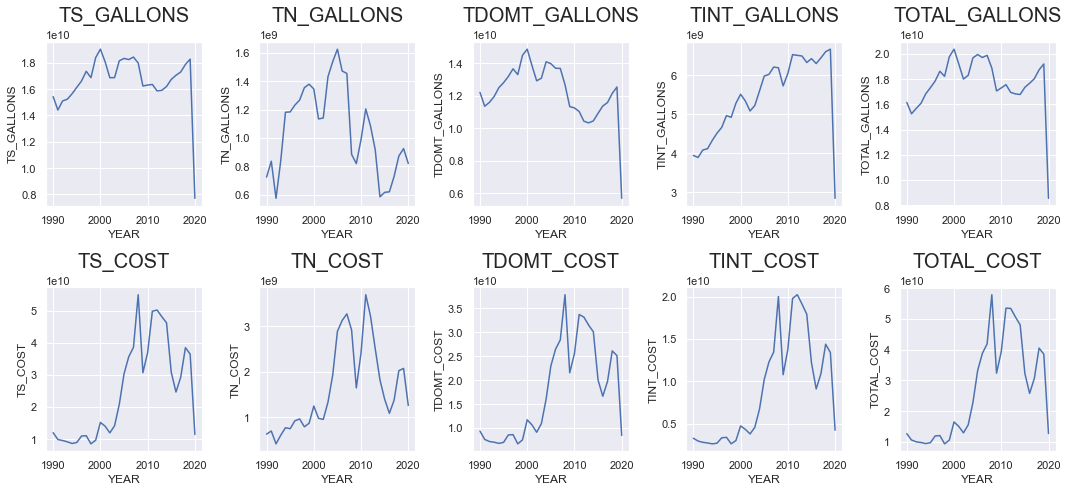

In [47]:
fig, ax = plt.subplots(2, 5, figsize=(15,7))

k = 0
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        ax[i,j].set_title(label=group_year.columns[k],
                          fontdict={'fontsize' : 20},
                          loc='center',
                          pad=20)
        sns.lineplot(x=group_year.index, y=group_year.columns[k],
                     data=group_year, ax=ax[i,j], palette=palette)
        k += 1

fig.tight_layout() 

### A/L analysis

The focus of this analysis is to show the main fuel figures for the top airlines according to total fuel consumption.

In [93]:
group_carrier_2019 = df4.loc[df4['YEAR'] == 2019, :] \
                        .groupby(['AIRLINE_ID', 'UNIQUE_CARRIER', 'CARRIER', 'CARRIER_NAME']) \
                        .sum().sort_values(by='TOTAL_GALLONS', ascending=False)
group_carrier_2019 = group_carrier_2019.loc[:, group_carrier_2019.columns[1:]]
group_carrier_2019.columns = [str(col) + ' (millions)' for col in group_carrier_2019.columns]
group_carrier_2019 = group_carrier_2019 / 1e6
group_carrier_2019

,,,,TS_GALLONS (millions),TN_GALLONS (millions),TDOMT_GALLONS (millions),TINT_GALLONS (millions),TOTAL_GALLONS (millions),TS_COST (millions),TN_COST (millions),TDOMT_COST (millions),TINT_COST (millions),TOTAL_COST (millions)
AIRLINE_ID,UNIQUE_CARRIER,CARRIER,CARRIER_NAME,,,,,,,,,,
19805.0,AA,AA,American Airlines Inc.,3659.887150,6.669460,2277.466904,1389.089706,3666.556610,7119.982564,13.080464,4380.597578,2752.465450,7133.063028
19790.0,DL,DL,Delta Air Lines Inc.,3614.857331,24.380119,2212.107995,1427.129455,3639.237450,7252.167882,62.563701,4452.270621,2862.460962,7314.731583
19977.0,UA,UA,United Air Lines Inc.,3548.478825,14.747072,1767.221317,1796.004580,3563.225897,6995.166149,28.799775,3457.587592,3566.378332,7023.965924
19393.0,WN,WN,Southwest Airlines Co.,2076.519421,1.286294,2053.144414,24.661301,2077.805715,4140.647257,2.589907,4084.883904,58.353260,4143.237164
20107.0,FX,FX,Federal Express Corporation,1169.427212,30.471294,713.216812,486.703554,1199.920366,2280.841000,63.524625,1386.352182,958.013443,2344.365625
19917.0,5X,5X,United Parcel Service,904.474000,0.000000,523.321000,381.153000,904.474000,1774.093000,0.000000,1026.122000,747.971000,1774.093000
20409.0,B6,B6,JetBlue Airways,885.471094,0.018583,697.271233,188.218444,885.489677,1847.152978,0.038550,1454.630668,392.560860,1847.191528
19930.0,AS,AS,Alaska Airlines Inc.,729.968382,0.449692,719.998939,11.186797,731.185736,1604.012231,2.368290,1578.035484,28.345037,1606.380521
20007.0,5Y,5Y,Atlas Air Inc.,0.000000,577.044279,185.972744,391.071535,577.044279,0.000000,1265.270081,408.143414,857.126667,1265.270081


In [94]:
top10 = group_carrier_2019.head(10)
top10

,,,,TS_GALLONS (millions),TN_GALLONS (millions),TDOMT_GALLONS (millions),TINT_GALLONS (millions),TOTAL_GALLONS (millions),TS_COST (millions),TN_COST (millions),TDOMT_COST (millions),TINT_COST (millions),TOTAL_COST (millions)
AIRLINE_ID,UNIQUE_CARRIER,CARRIER,CARRIER_NAME,,,,,,,,,,
19805.0,AA,AA,American Airlines Inc.,3659.887150,6.669460,2277.466904,1389.089706,3666.556610,7119.982564,13.080464,4380.597578,2752.465450,7133.063028
19790.0,DL,DL,Delta Air Lines Inc.,3614.857331,24.380119,2212.107995,1427.129455,3639.237450,7252.167882,62.563701,4452.270621,2862.460962,7314.731583
19977.0,UA,UA,United Air Lines Inc.,3548.478825,14.747072,1767.221317,1796.004580,3563.225897,6995.166149,28.799775,3457.587592,3566.378332,7023.965924
19393.0,WN,WN,Southwest Airlines Co.,2076.519421,1.286294,2053.144414,24.661301,2077.805715,4140.647257,2.589907,4084.883904,58.353260,4143.237164
20107.0,FX,FX,Federal Express Corporation,1169.427212,30.471294,713.216812,486.703554,1199.920366,2280.841000,63.524625,1386.352182,958.013443,2344.365625
19917.0,5X,5X,United Parcel Service,904.474000,0.000000,523.321000,381.153000,904.474000,1774.093000,0.000000,1026.122000,747.971000,1774.093000
20409.0,B6,B6,JetBlue Airways,885.471094,0.018583,697.271233,188.218444,885.489677,1847.152978,0.038550,1454.630668,392.560860,1847.191528
19930.0,AS,AS,Alaska Airlines Inc.,729.968382,0.449692,719.998939,11.186797,731.185736,1604.012231,2.368290,1578.035484,28.345037,1606.380521
20007.0,5Y,5Y,Atlas Air Inc.,0.000000,577.044279,185.972744,391.071535,577.044279,0.000000,1265.270081,408.143414,857.126667,1265.270081


In [95]:
x_labels = list(top10.index.get_level_values('CARRIER'))
x_labels

['AA', 'DL', 'UA', 'WN', 'FX', '5X', 'B6', 'AS', '5Y', 'NK']

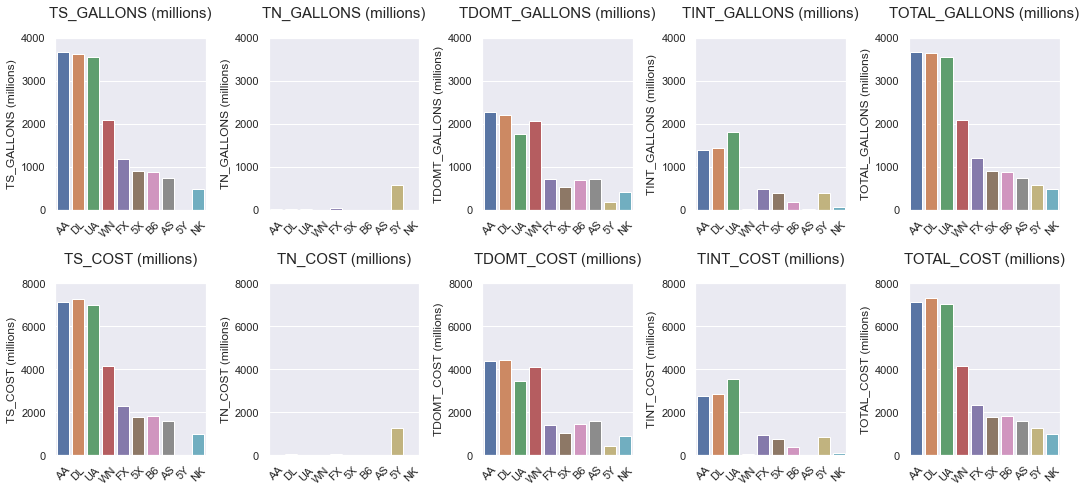

In [97]:
fig, ax = plt.subplots(2, 5, figsize=(15,7))

k = 0
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        ax[i,j].set_title(label=top10.columns[k],
                          fontdict={'fontsize' : 15},
                          loc='center',
                          pad=20)
        # The next line prevents the "UserWarning: FixedFormatter should only be used together with FixedLocator" message
        ax[i,j].set_xticks(np.arange(len(x_labels)))
        ax[i,j].set_xticklabels(labels=x_labels, rotation=45)
        if i == 0:
            ax[i,j].set_ylim(0, 4e3)
        elif i == 1:
            ax[i,j].set_ylim(0, 8e3)            
        # ax[i,j].tick_params(labelrotation=45)
            
        sns.barplot(x=x_labels, y=top10.columns[k],
                    data=top10, ax=ax[i,j])
        
        k += 1

fig.tight_layout() 

In [106]:
group_carrier_2019.reset_index(inplace=True)
group_carrier_2019

,AIRLINE_ID,UNIQUE_CARRIER,CARRIER,CARRIER_NAME,TS_GALLONS (millions),TN_GALLONS (millions),TDOMT_GALLONS (millions),TINT_GALLONS (millions),TOTAL_GALLONS (millions),TS_COST (millions),TN_COST (millions),TDOMT_COST (millions),TINT_COST (millions),TOTAL_COST (millions)
0,19805.0,AA,AA,American Airlines Inc.,3659.887150,6.669460,2277.466904,1389.089706,3666.556610,7119.982564,13.080464,4380.597578,2752.465450,7133.063028
1,19790.0,DL,DL,Delta Air Lines Inc.,3614.857331,24.380119,2212.107995,1427.129455,3639.237450,7252.167882,62.563701,4452.270621,2862.460962,7314.731583
2,19977.0,UA,UA,United Air Lines Inc.,3548.478825,14.747072,1767.221317,1796.004580,3563.225897,6995.166149,28.799775,3457.587592,3566.378332,7023.965924
3,19393.0,WN,WN,Southwest Airlines Co.,2076.519421,1.286294,2053.144414,24.661301,2077.805715,4140.647257,2.589907,4084.883904,58.353260,4143.237164
4,20107.0,FX,FX,Federal Express Corporation,1169.427212,30.471294,713.216812,486.703554,1199.920366,2280.841000,63.524625,1386.352182,958.013443,2344.365625
5,19917.0,5X,5X,United Parcel Service,904.474000,0.000000,523.321000,381.153000,904.474000,1774.093000,0.000000,1026.122000,747.971000,1774.093000
6,20409.0,B6,B6,JetBlue Airways,885.471094,0.018583,697.271233,188.218444,885.489677,1847.152978,0.038550,1454.630668,392.560860,1847.191528
7,19930.0,AS,AS,Alaska Airlines Inc.,729.968382,0.449692,719.998939,11.186797,731.185736,1604.012231,2.368290,1578.035484,28.345037,1606.380521
8,20007.0,5Y,5Y,Atlas Air Inc.,0.000000,577.044279,185.972744,391.071535,577.044279,0.000000,1265.270081,408.143414,857.126667,1265.270081
9,20416.0,NK,NK,Spirit Air Lines,470.938618,0.000000,418.487869,52.450749,470.938618,993.477185,0.000000,882.758273,110.718912,993.477185


From the above graphs, some facts come to light:
- From the top10 most fuel-consuming carriers, only one is a charter operator: *Atlas Air Inc. (5Y)*. This is based on the fact that its fuel consumption for Scheduled flights is null, whereas for Non-Scheduled it is quite high.
- Although *American Airlines Inc. (AA)* consumed more fuel than *Delta Air Lines Inc. (DL)*, it is the latter which spent more on fuel. Could this be related to different fuel prices paid by the two airlines?

In [109]:
csv_output_path = os.path.join(root,
                               "Output_Data",
                               "US_DoT",
                               "P12A_fuel_output_2019.csv")
csv_output_path

'C:\\Users\\turge\\CompartidoVM\\0.TFM\\Output_Data\\US_DoT\\P12A_fuel_output_2019.csv'

In [111]:
group_carrier_2019.to_csv(csv_output_path, encoding='latin1', index=False)

___